<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### The Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

Import the lending club info csv in order to get information about each column.

In [1]:
import pandas as pd
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [2]:
def feat_info(col_name):
    """Gives a description of the column selected"""
    print(data_info.loc[col_name]['Description'])
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  


# Section 1: Exploratory Data Analysis

**GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

Looking at the distribution of the two classes through the countplot below, we can see that they are not that evenly separated, meaning when going through proper analysis, we should incorporate metrics that account for the lack of diversity in the split (i.e., precision, recall, and F1-score) rather than just looking at accuracy.

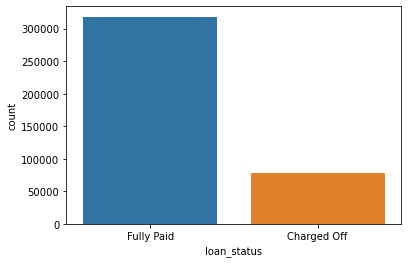

In [5]:
sns.countplot('loan_status', data=df)

Taking a look at the loan_amnt column, we get an idea of the average amount of loans given out. Visually we can deduce this amount around the 13-15k mark, which is validated by printing out the actual mean value.

14113.888089286165

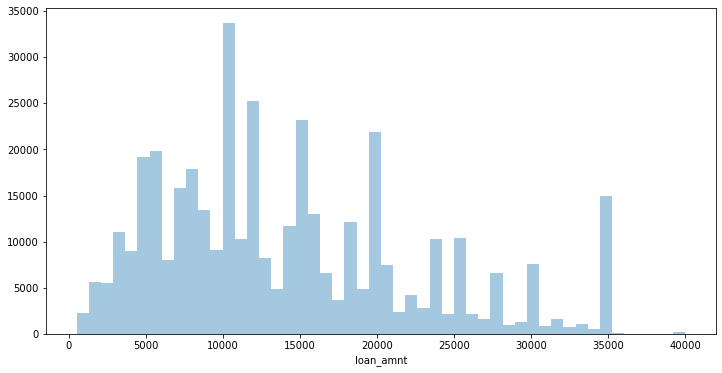

In [6]:
plt.figure(figsize=(12,6))
sns.distplot(df['loan_amnt'], kde=False)
df['loan_amnt'].mean()

Next, we take the heatmap below to visualize the correlation between features to further explore and determine if redundancies potentially exist, and can be removed.

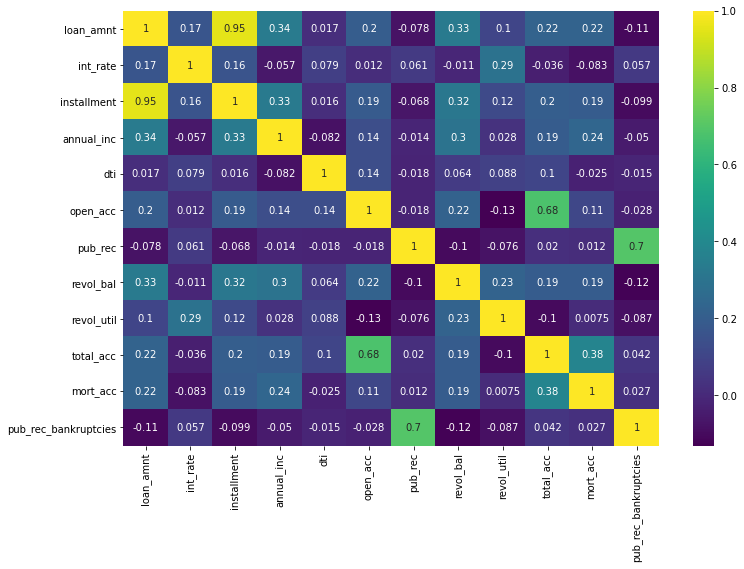

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), annot=True, cmap = 'viridis')

Examining the correlation heatmap, it can be seen that the loan_amnt and installment features are extremely correlated. Taking a look further, it would make sense as to why, since one of the features (installment) is dependent on the loan amount granted, along with a few other features such as the agreed upon repayment time, interest rate, etc. It would be to my understanding that this information is not entirely redundant, and that it should stay as a feature to help determine if future customers will end up repaying the loan.

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


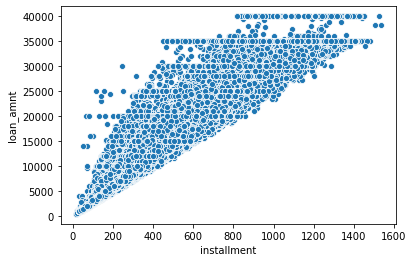

In [8]:
feat_info('installment')
print('\n')
feat_info('loan_amnt')
sns.scatterplot(x='installment', y='loan_amnt', data=df)

Let's take a look at the breakdown of the loan amount for those that do get paid back vs. those that default. One may think that since a loan is higher, it might get defaulted moreso, but that may not be the case. The box plot below, does show that there is not a huge difference in average amounts for the loans paid off or defaulted, which means that there are other important features to help determine the overall outcome. 

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


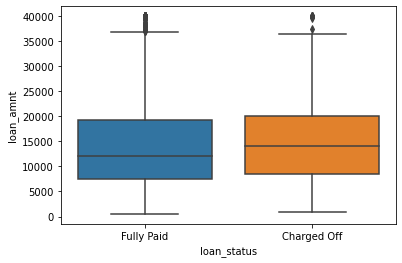

In [9]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
df.groupby('loan_status')['loan_amnt'].describe()

Looking at the available columns, let's explore the grade/subgrade features to determine if there is some overlap, potentially allowing for a feature to be dropped due to redundancy. 

In [10]:
ordered_grade = sorted(df['grade'].unique())
print('Ordered grade feature: ', ordered_grade)
print('\n')
ordered_subgrade = sorted(df['sub_grade'].unique())
print('Ordered subgrade feature: ', ordered_subgrade)

Ordered grade feature:  ['A', 'B', 'C', 'D', 'E', 'F', 'G']


Ordered subgrade feature:  ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


Below, visualizations and exploration into the breakdown of grade and subgrade are done to help determine which information is valuable.

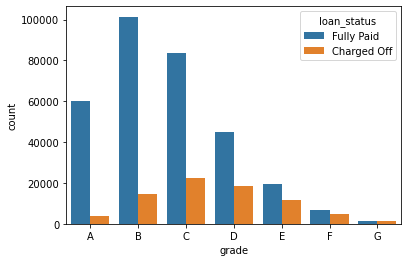

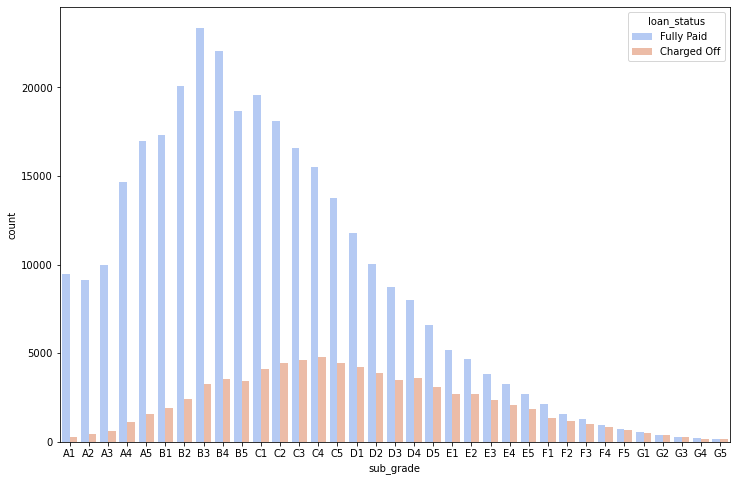

In [11]:
sns.countplot(x='grade', data=df, hue='loan_status', order= ordered_grade)
plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade', data=df, palette='coolwarm',hue='loan_status', order=ordered_subgrade)

From the countplots above, it appears that F and G grade loans seem to get defaulted at the highest clip, so below is a countplot to analyze the numbers on the F and G grade loans only. 

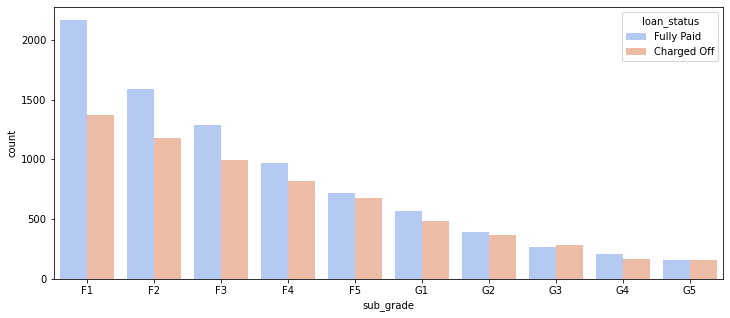

In [12]:
F_and_G = df[(df['grade'] == 'F')|(df['grade'] == 'G')]
plt.figure(figsize=(12,5))
ordered_subgrade = sorted(F_and_G['sub_grade'].unique())
sns.countplot(x='sub_grade', data=F_and_G, palette='coolwarm',hue='loan_status', order=ordered_subgrade)

Looking at the column loan_status, which is technically our target label, we realize that the label must be converted to digits for classification purposes later, thus below we create a new column called loan_repaid that takes the proper transform (1 for repaid and 0 for defaulted).

In [13]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [14]:
def loan(status):
    if status == 'Fully Paid':
        return 1
    else:
        return 0

df['loan_repaid'] = df['loan_status'].apply(loan)

In [15]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Now, we are able to create a correlation plot with the loan repaid column to determine the most influential features. It appears that the mort_acc column has the highest correlation to loan repayment.

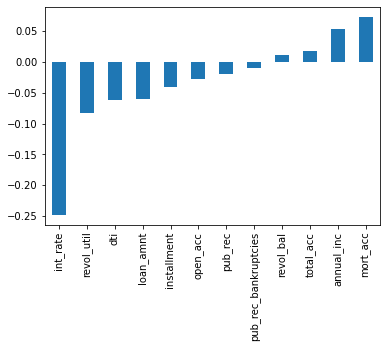

In [16]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')


# Section 2: Data PreProcessing

In [17]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

Let's determine the percentage of missing data per feature in order to determine the best method to either impute or remove data.

In [18]:
df.isnull().sum()/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Let's examine emp_title and emp_length to see whether it will be okay to drop them.

In [19]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [20]:
print(df['emp_title'].nunique())
print('\n')
df['emp_title'].value_counts()

173105




Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
splicing technician                1
Liebherr Cranes Inc                1
Business Service Specialist        1
brunswick landingarina             1
Palm spring general hospital       1
Name: emp_title, Length: 173105, dtype: int64

It appears that there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [21]:
df = df.drop('emp_title', axis=1)

Now, let's take a look at the emp_length feature and determine what should be done to the missing data.

In [22]:
sorted_emp_length = sorted(df['emp_length'].dropna().unique(),)
sorted_emp_length

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [23]:
#Let's go ahead and properly sort the feature info.
sorted_emp_length = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

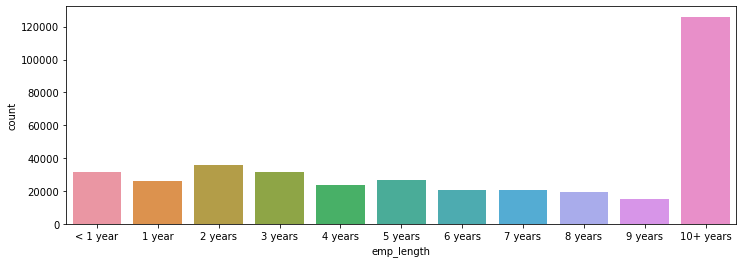

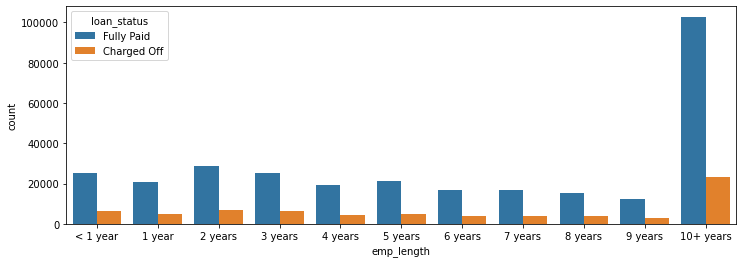

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=sorted_emp_length)

plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', hue='loan_status', data=df,order=sorted_emp_length)

From the visualizations above, we still cannot tell whether there is a strong relationship between employment length and charge offs. We should really be examining the percent of people per employment category that end up defaulting to see if there is some significance in that data.

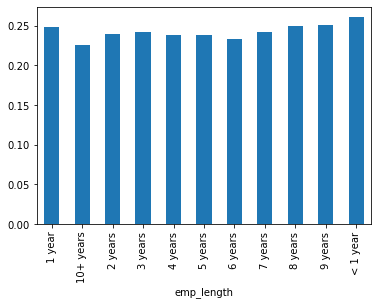

In [25]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
emp_length = emp_co/emp_fp
emp_length
emp_length.plot(kind='bar')

From the plot above, charge off rates are very similar across the board, thus we can remove this feature, as it is not very telling.

In [26]:
df = df.drop('emp_length', axis=1)

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Looking at the title column is simply a string subcategory/description of the purpose column. Let's drop it.

In [28]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [29]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [30]:
df = df.drop('title', axis=1)

In [31]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Let's look at mort_acc and fill in any missing data. In order to get a better understanding of how we want to fill in the data, we will look at the feature that has the highest correlation with it. It appears that the total_acc column has the highest correlation, so we will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.

In [32]:
print(feat_info('mort_acc'))
print(df['mort_acc'].value_counts())
print('\n')
print("Correlation with mort_acc column")
df.corr()['mort_acc'].sort_values()

Number of mortgage accounts.
None
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64


Correlation with mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [33]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [34]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [35]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()
total_acc_avg[3.0]

0.05202312138728324

In [36]:
def fill_mort_acc(total_acc, mort_acc):
    """Function used to fill the missing data in the mort_acc column. Uses the mean value for the
       mort_acc per total_acc entry in entry is NaN"""
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [37]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Since the revol_util and pub_rec_bankruptcies missing data accounts for less than 0.5% of the total data, let's just go ahead and remove the rows that are missing those values in the columns.

In [38]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [68]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
Let's now go through all the string features to see what we should do with them.

---


### term feature

In [157]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

For the term column, we can split it into two values to have a meaningful feature, either 36 or 60, indicating the term length in numeric form.

In [39]:
df['term'] = df['term'].apply(lambda x: int(x.split(' ')[1]))
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

### grade feature

Since grade is incorporated in the subgrade feature, we can go ahead and drop it. 

In [40]:
df = df.drop('grade', axis=1)

Now, let's convert the subgrade into dummy variables, then concatenate these new columns to the original dataframe.

In [41]:
df['sub_grade']

0         B4
1         B5
2         B3
3         A2
4         C5
          ..
396025    B4
396026    C1
396027    B1
396028    C2
396029    C2
Name: sub_grade, Length: 395219, dtype: object

In [42]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
subgrade_dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [44]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
Now, we will convert these columns into dummy variables as well and concatenate them onto our df.

In [45]:
other_dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']] , drop_first=True)
other_dummies

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [46]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,other_dummies],axis=1)

### home_ownership

In [47]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Apply a lambda function to convert the "NONE" and "ANY" columns to "OTHER" and then create dummies and concatenate.

In [48]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address

From the address column, we can feature engineer a zip code column.

In [49]:
#df['address'][0].split(' ')[-1]
df['zip_code'] = df['address'].apply(lambda x: x.split(' ')[-1])
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [50]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code', 'address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d 
This feature would not be known as our model is determing whether or not to give out a loan, so remove it.

In [52]:
feat_info('issue_d')
df = df.drop('issue_d',axis=1)
df

The month which the loan was funded


,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,Nov-2004,6.0,0.0,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,Feb-2006,6.0,0.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,Mar-1997,15.0,0.0,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,Nov-1990,9.0,0.0,...,0,0,0,0,1,0,0,0,0,0


### earliest_cr_line
Let's extract the year from this column and make it a feature for our model.

In [54]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [55]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [56]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

### loan_status

In [58]:
df = df.drop('loan_status',axis=1)

## Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
scaler.fit(X_train)

MinMaxScaler()

In [65]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [67]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(70,  activation='relu'))
model.add(Dropout(0.25))

# hidden layer
model.add(Dense(70, activation='relu'))
model.add(Dropout(0.25))

# hidden layer
model.add(Dense(35, activation='relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.

In [68]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 12s 36us/sample - loss: 0.2996 - val_loss: 0.2651
Epoch 2/25
316175/316175 [==============================] - 11s 34us/sample - loss: 0.2650 - val_loss: 0.2632
Epoch 3/25
316175/316175 [==============================] - 11s 35us/sample - loss: 0.2628 - val_loss: 0.2623
Epoch 4/25
316175/316175 [==============================] - 11s 36us/sample - loss: 0.2614 - val_loss: 0.2622
Epoch 5/25
316175/316175 [==============================] - 11s 36us/sample - loss: 0.2610 - val_loss: 0.2620
Epoch 6/25
316175/316175 [==============================] - 11s 36us/sample - loss: 0.2604 - val_loss: 0.2621
Epoch 7/25
316175/316175 [==============================] - 11s 36us/sample - loss: 0.2599 - val_loss: 0.2616
Epoch 8/25
316175/316175 [==============================] - 12s 36us/sample - loss: 0.2597 - val_loss: 0.2616
Epoch 9/25
316175/316175 [==============================] - 11s 36us/

In [135]:
from tensorflow.keras.models import load_model
model.save('full_data_project_model.h5') 

# Section 3: Evaluating Model Performance.

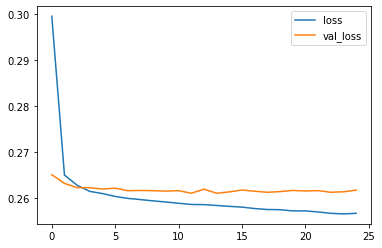

In [69]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
preds = model.predict_classes(X_test)
print(classification_report(y_test,preds))
print('\n')
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6799  8859]
 [   57 63329]]


**TASK: Given the customer below, would you offer this person a loan?**

Yes, based on our model, the result would be to give this candidate a loan

In [71]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [72]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]], dtype=int32)

**TASK: Now check, did this person actually end up paying back their loan?**

This candidate did repay the loan.

In [73]:
df.iloc[random_ind]['loan_repaid']

1.0

# GREAT JOB!